# 다항회귀분석

##### 피처들(독립변수)과 레이블(종속변수)이 2차 함수 이상인 관계를 가지는 것으로 곡선이나 더 복잡한 모양을 표현하는 것이 가능

## 피처들(독립변수)의 차수를 높이는 형태
###### 다항회귀 역시 선형회귀로 간주되는데 선형회귀의 정의가 단순히 직선이나 곡선과 같은 모양에 있는 것이 아니라 가중치와 피처들의 선형 결합에 있기때문 
###### 다항회귀는 별도로 알고리즘이 있는 것이 아니라 피처들을 제곱, 서로 곱한 값 등 좀 더 복잡한 값으로 만들어 선형 회귀에 넣어서 학습시킴 
###### sklearn-learn에서는 PolynomialFeatures 클래스로 원본 단항 Feature들을 다항 Feature들로 변환한 데이터 세트에 LinearRegression 객체를 적용하는 것으로 다항회귀 기능 제공

### #01. 작업준비

패키지 가져오기

In [1]:
import sys

sys.path.append("../../")
import helper

import numpy as np
import seaborn as sb
from pandas import read_excel, DataFrame
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# 그래프 한글 설정
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

In [3]:
origin = read_excel("https://data.hossam.kr/E04/cars.xlsx")
origin.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


#### 데이터 전처리

##### 0차항(1)을 포함하는 2차식으로 변환
##### polynomialfeatures 클래스를 사용하여 y = ax +b 라는 회귀식을 y = ax^2 + bx + c 형태로 바꾼다.
> ###### degree:변환할 차수(기본값=2)
> ###### include_bias : True 인경우 0차항(1)도 함께 생성한다. (기본값= True)

In [4]:
poly = PolynomialFeatures(degree=2, include_bias=True)
fit = poly.fit_transform(origin[['speed']])
fit

array([[  1.,   4.,  16.],
       [  1.,   4.,  16.],
       [  1.,   7.,  49.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.],
       [  1.,  10., 100.],
       [  1.,  10., 100.],
       [  1.,  11., 121.],
       [  1.,  11., 121.],
       [  1.,  12., 144.],
       [  1.,  12., 144.],
       [  1.,  12., 144.],
       [  1.,  12., 144.],
       [  1.,  13., 169.],
       [  1.,  13., 169.],
       [  1.,  13., 169.],
       [  1.,  13., 169.],
       [  1.,  14., 196.],
       [  1.,  14., 196.],
       [  1.,  14., 196.],
       [  1.,  14., 196.],
       [  1.,  15., 225.],
       [  1.,  15., 225.],
       [  1.,  15., 225.],
       [  1.,  16., 256.],
       [  1.,  16., 256.],
       [  1.,  17., 289.],
       [  1.,  17., 289.],
       [  1.,  17., 289.],
       [  1.,  18., 324.],
       [  1.,  18., 324.],
       [  1.,  18., 324.],
       [  1.,  18., 324.],
       [  1.,  19., 361.],
       [  1.,  19., 361.],
 

생성된 피처의 이름 확인

In [5]:
poly.get_feature_names_out()

array(['1', 'speed', 'speed^2'], dtype=object)

0차항 (1)을 포함하지 않는 2차식으로 변환(권장)

In [6]:
poly = PolynomialFeatures(include_bias=False)
fit = poly.fit_transform(origin[['speed']])
fit

array([[  4.,  16.],
       [  4.,  16.],
       [  7.,  49.],
       [  7.,  49.],
       [  8.,  64.],
       [  9.,  81.],
       [ 10., 100.],
       [ 10., 100.],
       [ 10., 100.],
       [ 11., 121.],
       [ 11., 121.],
       [ 12., 144.],
       [ 12., 144.],
       [ 12., 144.],
       [ 12., 144.],
       [ 13., 169.],
       [ 13., 169.],
       [ 13., 169.],
       [ 13., 169.],
       [ 14., 196.],
       [ 14., 196.],
       [ 14., 196.],
       [ 14., 196.],
       [ 15., 225.],
       [ 15., 225.],
       [ 15., 225.],
       [ 16., 256.],
       [ 16., 256.],
       [ 17., 289.],
       [ 17., 289.],
       [ 17., 289.],
       [ 18., 324.],
       [ 18., 324.],
       [ 18., 324.],
       [ 18., 324.],
       [ 19., 361.],
       [ 19., 361.],
       [ 19., 361.],
       [ 20., 400.],
       [ 20., 400.],
       [ 20., 400.],
       [ 20., 400.],
       [ 20., 400.],
       [ 22., 484.],
       [ 23., 529.],
       [ 24., 576.],
       [ 24., 576.],
       [ 24.,

생성된 피처의 이름 확인

In [7]:
poly.get_feature_names_out()

array(['speed', 'speed^2'], dtype=object)

데이터 프레임으로 재구성

In [8]:
x = DataFrame(fit, columns=poly.get_feature_names_out())
x.head()

,speed,speed^2
0,4.0,16.0
1,4.0,16.0
2,7.0,49.0
3,7.0,49.0
4,8.0,64.0


종속변수만 추출한 데이터 프레임

In [9]:
y = origin[['dist']]
y.head()

,dist
0,2
1,10
2,4
3,22
4,16


테스트 데이터와 검증 데이터로 분리

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True, random_state=42)
x_train.shape, y_train.shape

((35, 2), (35, 1))

### 회귀분석 수행
##### 데이터 표본수(35)가 작기때문에 과적합이 발생하지만 예제 데이터셋이므로 과적합은 무시하고 진행하도록 한다.

In [11]:
model = LinearRegression()
fit = model.fit(x_train, y_train)

print("계수: ", fit.coef_)
print("절편: ", fit.intercept_)
print("훈련 데이터 설명력: ", fit.score(x_train, y_train))
print("검증 데이터 설명력: ", fit.score(x_test, y_test))

계수:  [[1.97370235 0.0601573 ]]
절편:  [-4.44412881]
훈련 데이터 설명력:  0.6386048074085511
검증 데이터 설명력:  0.7101851923162426


회귀식 추정

In [12]:
feature_names = x.columns

expr=[]
for i, v in enumerate(feature_names):
    expr.append("%f x %s" % (fit.coef_[0][i], v))

expr = " + ".join(expr)
expr = "y = " + expr + "+%f" % fit.intercept_[0]
expr

'y = 1.973702 x speed + 0.060157 x speed^2+-4.444129'

예측값 생성

훈련 데이터에 대한 예측값

In [13]:
y_train_pred = fit.predict(x_train)
y_train_pred = y_train_pred.reshape(-1)
y_train_pred

array([21.30862466, 59.09283798, 77.57533206, 77.57533206, 31.38058538,
       24.5456303 , 31.38058538, 38.69679884, 50.57347853, 50.57347853,
        4.4131974 , 72.77423665, 42.53537747, 50.57347853, 18.19193362,
       46.4942707 , 27.90295054, 54.77300096,  4.4131974 , 34.97853481,
       12.31949534, 68.09345583, 54.77300096, 38.69679884, 59.09283798,
       24.5456303 , 34.97853481, 31.38058538, 82.49674208, 34.97853481,
       21.30862466, 59.09283798, 27.90295054, 46.4942707 , 59.09283798])

검증 데이터에 대한 예측값

In [14]:
y_test_pred = fit.predict(x_test)
y_test_pred = y_test_pred.reshape(-1)
y_test_pred

array([27.90295054, 59.09283798, 46.4942707 , 77.57533206, 31.38058538,
       77.57533206, 42.53537747, 38.69679884, 50.57347853, 34.97853481,
       27.90295054, 15.19555718, 54.77300096, 21.30862466, 12.31949534])

학습 결과 시각화

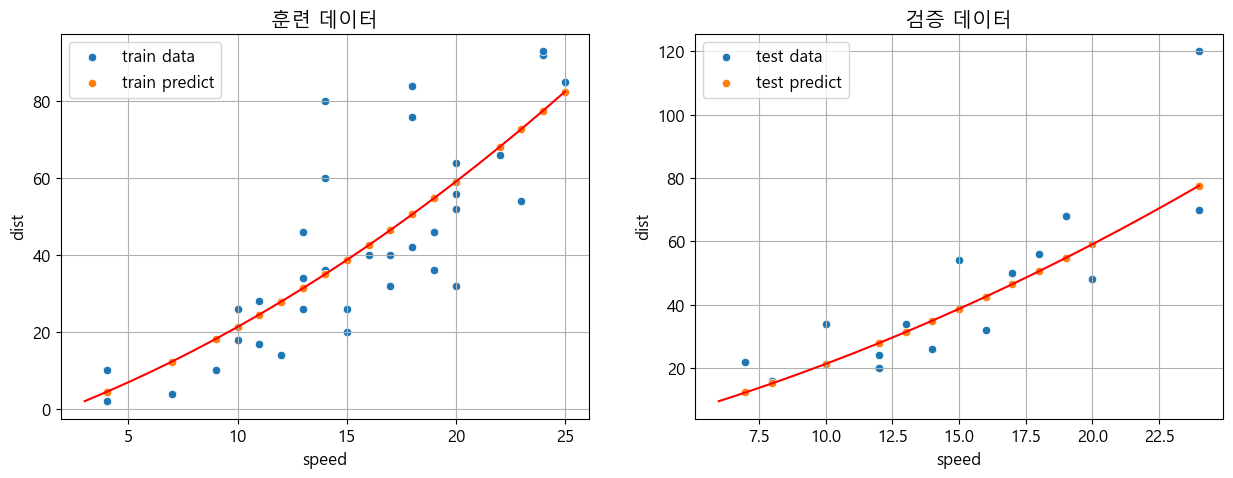

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# 학습에 사용한 데이터와 예측값의 차이를 시각화
sb.scatterplot(x=x_train['speed'], y=y_train['dist'], label='train data', ax=ax1)
sb.scatterplot(x=x_train['speed'], y=y_train_pred, label='train predict', ax=ax1)

# 그래프가 그려진 범위 안에서 1씩 증가하는 좌표를 생성
xmin, xmax = ax1.get_xlim()
xrange = np.arange(xmin.round(), xmax.round(), 1)
# y값에 대한 추정치를 계산
y_pred = xrange * fit.coef_[0][0] + xrange**2 * fit.coef_[0][1] + fit.intercept_[0]

# 추세선
sb.lineplot(x=xrange, y=y_pred, color='red', ax=ax1)

ax1.set_title("훈련 데이터")
ax1.legend()
ax1.grid()


# 검증용 데이터와 예측값의 차이를 시각화
sb.scatterplot(x=x_test['speed'], y=y_test['dist'], label='test data', ax=ax2)
sb.scatterplot(x=x_test['speed'], y=y_test_pred, label='test predict', ax=ax2)

# 그래프가 그려진 범위 안에서 1씩 증가하는 좌표를 생성
xmin, xmax = ax2.get_xlim()
xrange = np.arange(xmin.round(), xmax.round(), 1)

# y값에 대한 추정치를 계산
y_pred = xrange * fit.coef_[0][0] + xrange**2 * fit.coef_[0][1] + fit.intercept_[0]

# 추세선
sb.lineplot(x=xrange, y=y_pred, color='red', ax=ax2)

ax2.set_title("검증 데이터")
ax2.legend()
ax2.grid()

plt.show()
plt.close()

### #03. 농어의 크기에 따른 무게 예측

데이터 가져오기

In [16]:
origin = read_excel("https://data.hossam.kr/F02/fish2.xlsx")
origin.head()

,길이,높이,두께,무게
0,8.4,2.11,1.41,5.9
1,13.7,3.53,2.00,32.0
2,15.0,3.82,2.43,40.0
3,16.2,4.59,2.63,51.5
4,17.4,4.59,2.94,70.0


데이터 전처리

다항식으로 변환하기

In [17]:
poly = PolynomialFeatures(include_bias=False)
fit = poly.fit_transform(origin[['길이', '높이', '두께']])
x = DataFrame(fit, columns=poly.get_feature_names_out())
x.head()

,길이,높이,두께,길이^2,길이 높이,길이 두께,높이^2,높이 두께,두께^2
0,8.4,2.11,1.41,70.56,17.724,11.844,4.4521,2.9751,1.9881
1,13.7,3.53,2.00,187.69,48.361,27.400,12.4609,7.0600,4.0000
2,15.0,3.82,2.43,225.00,57.300,36.450,14.5924,9.2826,5.9049
3,16.2,4.59,2.63,262.44,74.358,42.606,21.0681,12.0717,6.9169
4,17.4,4.59,2.94,302.76,79.866,51.156,21.0681,13.4946,8.6436


모듈 기능을 활용한 다항식 변환

In [18]:
x = helper.convertPloy(origin[['길이', '높이', '두께']])
x.head()

,길이,높이,두께,길이^2,길이 높이,길이 두께,높이^2,높이 두께,두께^2
0,8.4,2.11,1.41,70.56,17.724,11.844,4.4521,2.9751,1.9881
1,13.7,3.53,2.00,187.69,48.361,27.400,12.4609,7.0600,4.0000
2,15.0,3.82,2.43,225.00,57.300,36.450,14.5924,9.2826,5.9049
3,16.2,4.59,2.63,262.44,74.358,42.606,21.0681,12.0717,6.9169
4,17.4,4.59,2.94,302.76,79.866,51.156,21.0681,13.4946,8.6436


훈련 데이터와 검증 데이터로 분리

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, origin[['무게']], test_size=0.3, random_state=42)
x_train.shape

(39, 9)

회귀분석 수행

In [20]:
model = LinearRegression()
fit = model.fit(x_train, y_train)

print("계수: ", fit.coef_)
print("절편: ", fit.intercept_)
print("훈련 데이터 설명력: ", fit.score(x_train, y_train))
print("검증 데이터 설명력: ", fit.score(x_test, y_test))

계수:  [[  38.38379084  -89.7388248  -200.86475311   -2.40976068    8.76543456
    10.46682516   30.02053716 -127.55300689   98.52431502]]
절편:  [113.73055823]
훈련 데이터 설명력:  0.9898271546307027
검증 데이터 설명력:  0.9713771600629659


회귀식 추정

In [21]:
feature_names = x.columns

expr = []
for i, v in enumerate(feature_names):
    expr.append(f"{round(fit.coef_[0][i], 2)} * {v}")
    
expr = " + ".join(expr)
expr = f"y = {expr} + {round(fit.intercept_[0], 2)}"
expr

'y = 38.38 * 길이 + -89.74 * 높이 + -200.86 * 두께 + -2.41 * 길이^2 + 8.77 * 길이 높이 + 10.47 * 길이 두께 + 30.02 * 높이^2 + -127.55 * 높이 두께 + 98.52 * 두께^2 + 113.73'

### 예측값 생성
##### 훈련 데이터에 대한 예측값

In [22]:
y_train_pred = fit.predict(x_train)
y_train_pred = y_train_pred.reshape(-1)
y_train_pred

array([  47.89054201,  687.95965204,  180.71867425,  888.30453926,
        910.72144095,  965.09304895,  120.25756298,  111.47808817,
        123.4796306 ,  213.33388138,  239.18145678, 1032.87769675,
        890.13316247,  159.84750404,  110.36469355,  236.22674307,
        951.97416519,  510.26745121,  223.16310647,  721.79202992,
         47.14508645,  132.70574231,   35.98715737,  665.51445909,
        815.80307381,  279.07095154,  150.33380325,  744.81018362,
         98.1158406 ,  149.7776806 ,  153.34387404, 1073.27879704,
        152.574139  ,   77.48789104,  677.72248934,  130.86832715,
        200.19684937, 1030.9353165 ,  596.26326784])

검증 데이터에 대한 예측값

In [23]:
y_test_pred = fit.predict(x_test)
y_test_pred = y_test_pred.reshape(-1)
y_test_pred

array([  22.92877835,   31.10777487,  250.98436388,  111.59208216,
        128.85787135,  779.24558158,  304.72417951,  176.31471164,
        916.8961555 ,   98.7200446 , 1180.23592257,   34.86148711,
        288.45880297,  272.52503942,   85.71366627,  120.24574045,
         59.93605383])

### 학습결과 시각화

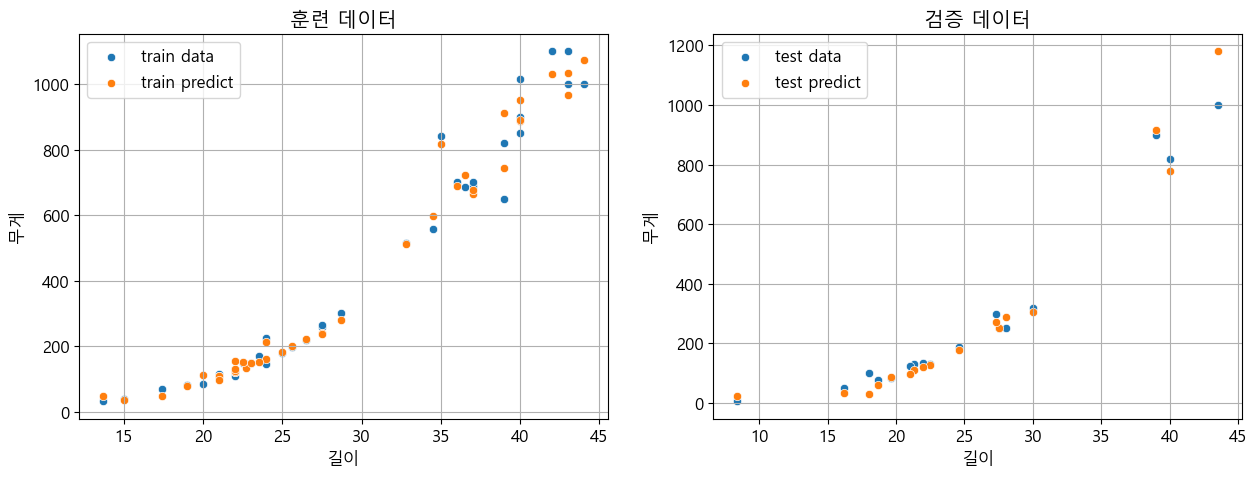

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sb.scatterplot(x=x_train['길이'], y=y_train['무게'], label='train data', ax=ax1)
sb.scatterplot(x=x_train['길이'], y=y_train_pred, label='train predict', ax=ax1)

ax1.set_title("훈련 데이터")
ax1.legend()
ax1.grid()

sb.scatterplot(x=x_test['길이'], y=y_test['무게'], label='test data', ax=ax2)
sb.scatterplot(x=x_test['길이'], y=y_test_pred, label='test predict', ax=ax2)

ax2.set_title("검증 데이터")
ax2.legend()
ax2.grid()

plt.show()
plt.close()

### 길이에 따른 무게에 대한 추세선

###### seaborn의 regplot 함수는 직선 형태의 추세선만 제공하기 때문에 2차식을 표현하는 추세선은 직접 구현해야 함

x 변수

In [25]:
x = x_train['길이']
x

4     17.4
41    36.0
27    25.0
47    40.0
46    39.0
52    43.0
15    22.0
9     20.0
16    22.0
24    24.0
31    27.5
53    43.0
48    40.0
25    24.0
11    21.0
32    27.5
49    40.0
37    32.8
29    26.5
40    36.5
1     13.7
21    22.7
2     15.0
43    37.0
39    35.0
35    28.7
23    23.5
45    39.0
10    21.0
22    23.0
18    22.0
55    44.0
20    22.5
7     19.0
42    37.0
14    22.0
28    25.6
51    42.0
38    34.5
Name: 길이, dtype: float64

y축 변수

In [26]:
y = y_train['무게']
y.head()

4      70.0
41    700.0
27    180.0
47    850.0
46    820.0
Name: 무게, dtype: float64

x에 따라 y값이 변하는 2차 방정식 생성

In [27]:
coeff = np.polyfit(x, y, 2)
coeff

array([  1.01075418, -21.29590996, 111.3569755 ])

평면좌표 상에서의 가상의 x값 생성

In [28]:
Vtrand = np.linspace(x.min(), x.max(), 100)
Vtrand

array([13.7       , 14.00606061, 14.31212121, 14.61818182, 14.92424242,
       15.23030303, 15.53636364, 15.84242424, 16.14848485, 16.45454545,
       16.76060606, 17.06666667, 17.37272727, 17.67878788, 17.98484848,
       18.29090909, 18.5969697 , 18.9030303 , 19.20909091, 19.51515152,
       19.82121212, 20.12727273, 20.43333333, 20.73939394, 21.04545455,
       21.35151515, 21.65757576, 21.96363636, 22.26969697, 22.57575758,
       22.88181818, 23.18787879, 23.49393939, 23.8       , 24.10606061,
       24.41212121, 24.71818182, 25.02424242, 25.33030303, 25.63636364,
       25.94242424, 26.24848485, 26.55454545, 26.86060606, 27.16666667,
       27.47272727, 27.77878788, 28.08484848, 28.39090909, 28.6969697 ,
       29.0030303 , 29.30909091, 29.61515152, 29.92121212, 30.22727273,
       30.53333333, 30.83939394, 31.14545455, 31.45151515, 31.75757576,
       32.06363636, 32.36969697, 32.67575758, 32.98181818, 33.28787879,
       33.59393939, 33.9       , 34.20606061, 34.51212121, 34.81

생성된 x값에 따른 y값 만들기

In [29]:
Ttrand = coeff[0] * Vtrand**2 + coeff[1] * Vtrand + coeff[2]
Ttrand

array([   9.31146135,   11.36454853,   13.60699666,   16.03880574,
         18.65997575,   21.47050671,   24.47039862,   27.65965147,
         31.03826526,   34.60624   ,   38.36357568,   42.3102723 ,
         46.44632987,   50.77174838,   55.28652784,   59.99066824,
         64.88416959,   69.96703187,   75.23925511,   80.70083928,
         86.35178441,   92.19209047,   98.22175748,  104.44078543,
        110.84917433,  117.44692417,  124.23403496,  131.21050668,
        138.37633936,  145.73153297,  153.27608754,  161.01000304,
        168.93327949,  177.04591688,  185.34791522,  193.8392745 ,
        202.51999473,  211.3900759 ,  220.44951801,  229.69832107,
        239.13648507,  248.76401001,  258.5808959 ,  268.58714273,
        278.78275051,  289.16771923,  299.7420489 ,  310.50573951,
        321.45879106,  332.60120356,  343.932977  ,  355.45411138,
        367.16460671,  379.06446299,  391.1536802 ,  403.43225837,
        415.90019747,  428.55749752,  441.40415851,  454.44018

확인

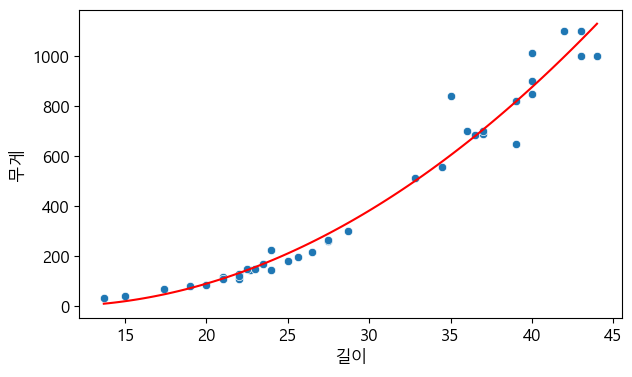

In [30]:
plt.figure(figsize=(7,4))
sb.scatterplot(x=x_train['길이'], y=y_train['무게'])
sb.lineplot(x=Vtrand, y=Ttrand, color='red')
plt.show()
plt.close()

모듈에 구현해 둔 추세선 생성 함수 활용

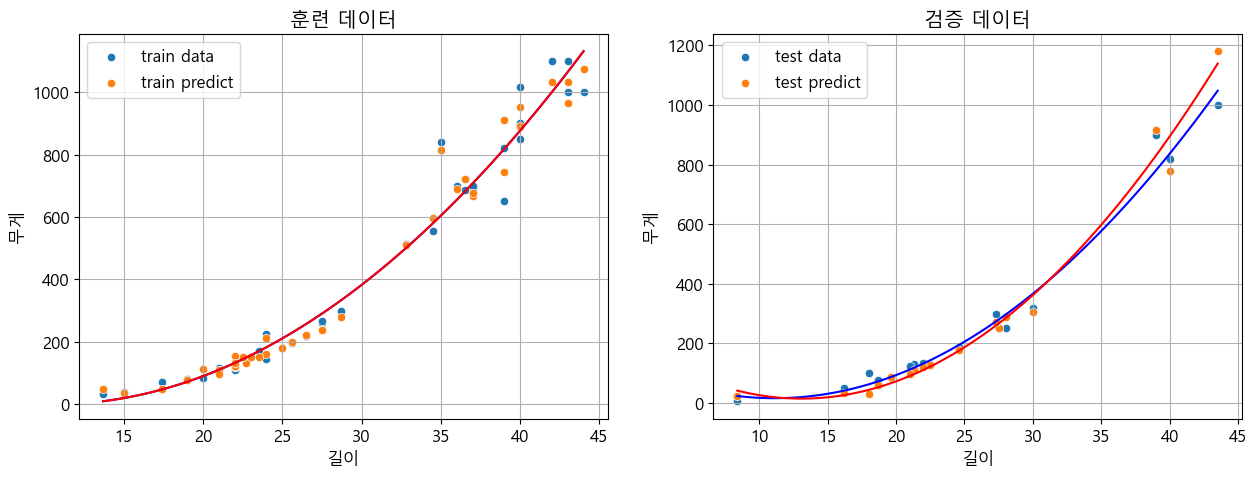

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# 학습에 사용한 관측치 시각화
sb.scatterplot(x=x_train['길이'], y=y_train['무게'], label='train data', ax=ax1)

# 학습에 사용한 데이터에 추세선
x, y = helper.getTrend(x_train['길이'], y_train['무게'])
sb.lineplot(x=x, y=y, color='blue', ax=ax1)

# 학습 데이터에 따른 추정치
sb.scatterplot(x=x_train['길이'], y=y_train_pred, label='train predict', ax=ax1)

# 추정치에 대한 추세선
x, y = helper.getTrend(x_train['길이'], y_train_pred)
sb.lineplot(x=x, y=y, color='red', ax=ax1)

ax1.set_title("훈련 데이터")
ax1.legend()
ax1.grid()

# 검증데이터 시각화
sb.scatterplot(x=x_test['길이'], y=y_test['무게'], label='test data', ax=ax2)

# 검증데이터의 추세선
x, y = helper.getTrend(x_test['길이'], y_test['무게'])
sb.lineplot(x=x, y=y, color='blue', ax=ax2)

# 검증데이터에 대한 추정치 시각화
sb.scatterplot(x=x_test['길이'], y=y_test_pred, label='test predict', ax=ax2)

# 검증데이터 추정치에 대한 추세선
x, y = helper.getTrend(x_test['길이'], y_test_pred)
sb.lineplot(x=x, y=y, color='red', ax=ax2)

ax2.set_title("검증 데이터")
ax2.legend()
ax2.grid()

plt.show()
plt.close()

### 회귀분석 학습결과 그래프 모듈 기능 활용
##### 훈련데이터에 대한 단일 그래프

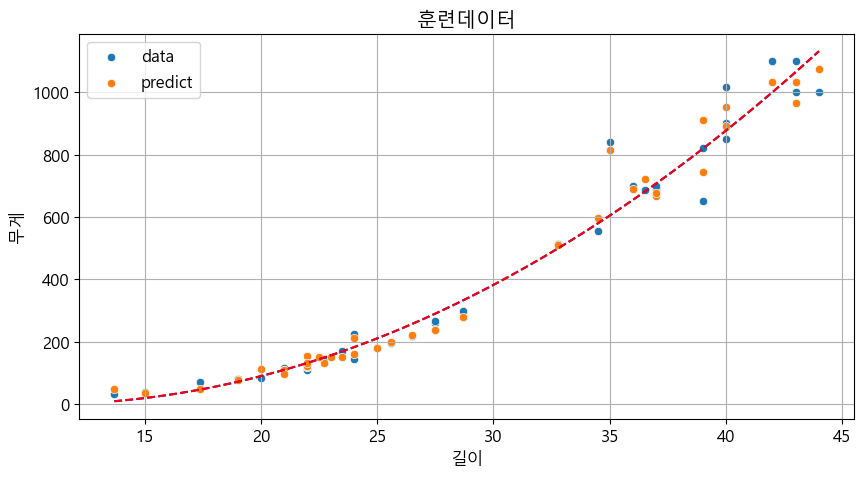

In [32]:
helper.regplot(x_train['길이'], y_train['무게'], y_train_pred, "훈련데이터", figsize=(10, 5))

검증 데이터에 대한 단일 그래프

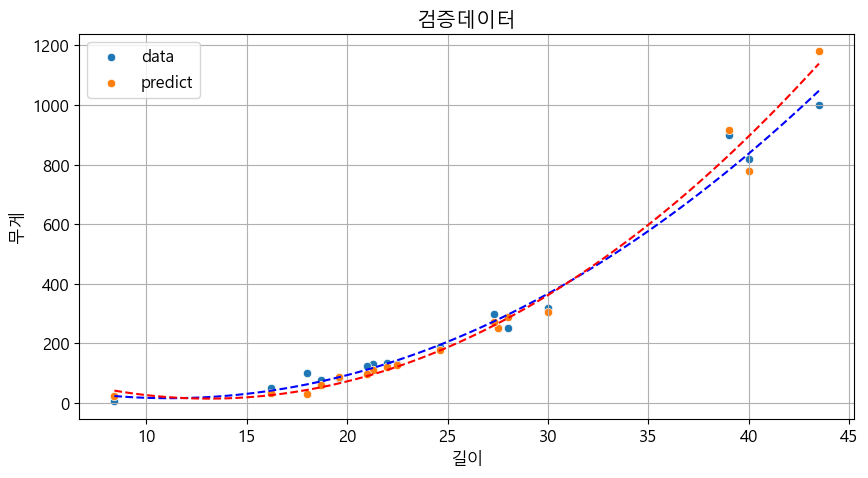

In [33]:
helper.regplot(x_test['길이'], y_test['무게'], y_test_pred, "검증데이터", figsize=(10, 5))

훈련, 검증 데이터에 대한 서브 플롯

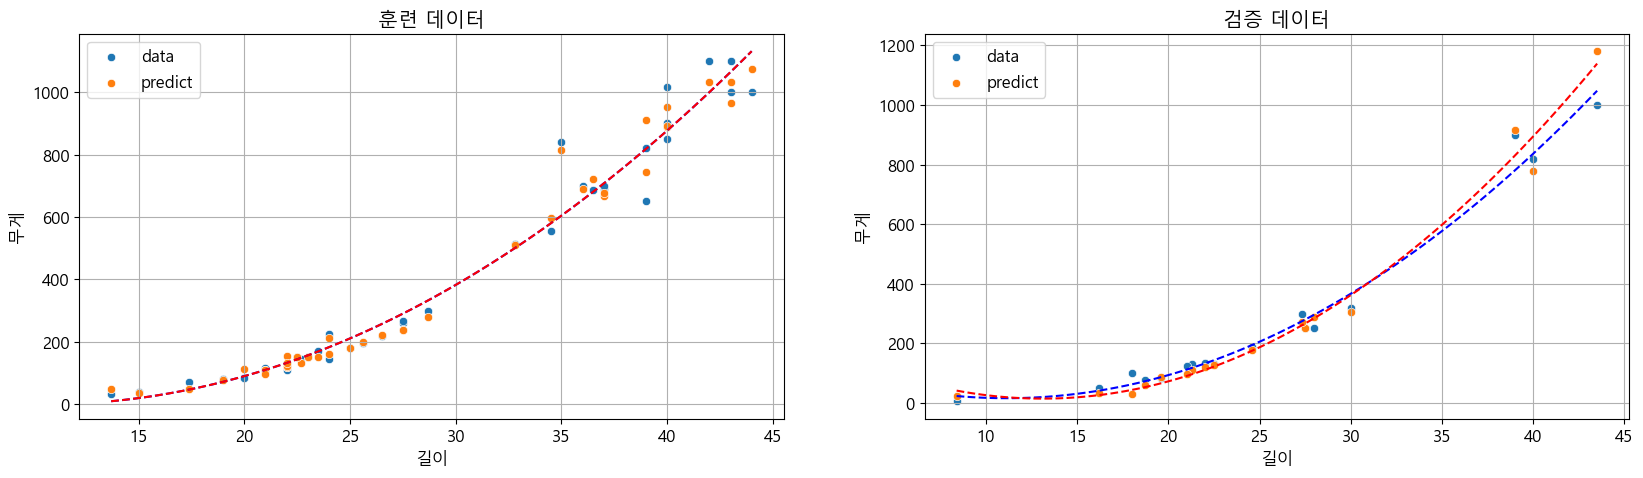

In [34]:
helper.regplot(x_train['길이'], y_train['무게'], y_train_pred, "훈련 데이터", 
               x_test['길이'], y_test['무게'], y_test_pred, "검증 데이터", 
               figsize=(20, 5), save_path="다항회귀.png")